# What are your chances to survive Titaninc Disaster



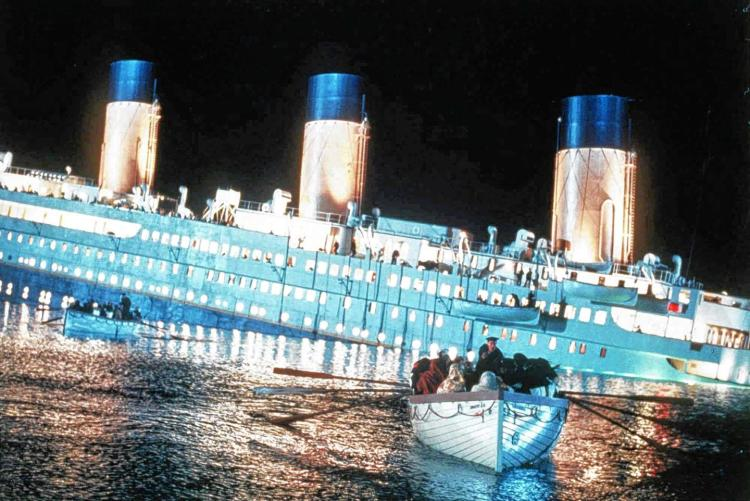

In [214]:
from IPython.display import Image
Image("http://assets.nydailynews.com/polopoly_fs/1.1057617.1333748255!/img/httpImage/image.jpg_gen/derivatives/article_750/pop8n-2-web.jpg",height=500,width=500)



# Importing Tools

In [215]:
#Data Analysis
import pandas as pd
import numpy as np

#Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#Other
from IPython.display import display


In [216]:
#Importing DATA
#There are 2 datasets
df_test= pd.read_csv("test.csv")
df_train= pd.read_csv("train.csv")


# Data Analysis by Numbers

In [217]:
display(df_train.head())
display(df_test.head())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We see the target variable in df_train, therfore will use it for further operations.

In [218]:
display(df_train.describe())
display(df_train.info())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

##### Analysis

Categorical: Survived, Sex, Embarked

Oridinal: Pclass

Continous: Age, Fare

Discrete: SibSp, Parch


# Data Analysis with Graphs

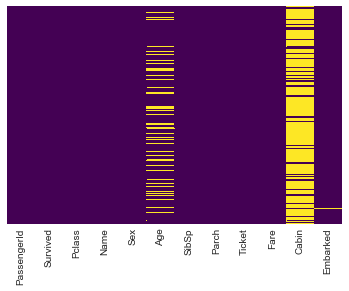

In [219]:
#MIssing Datab
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

-> Around 20% of the Age Data is missing which could be replaced with some form of imputation


-> Roughly 90% od cabin data is missing which means it could either be dropped or make another feature like "Cabin Known: 1 or 0"

#### Count of "Survived"

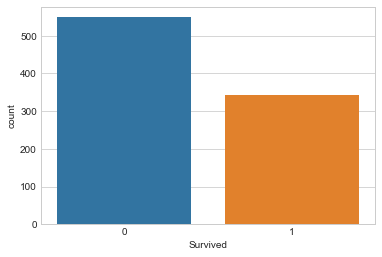

In [220]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data= df_train)

Almost one third of the people survived

,Survived
Sex,
male,0.188908
female,0.742038


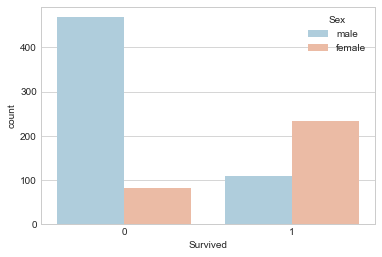

In [221]:
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by= 'Survived')

plt.figure()
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='RdBu_r')
df_train[['Sex','Survived']].groupby(['Sex'], as_index=True).mean().sort_values(by= 'Survived')


*Women* more likely survived than *Men*

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


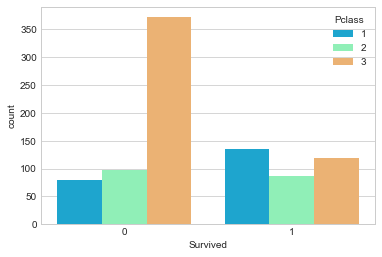

In [222]:
plt.figure()
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='rainbow')

df_train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)


Passengers from *1st Class* more likely survived. <br>
Passengers from *3rd Class* more likely dead.


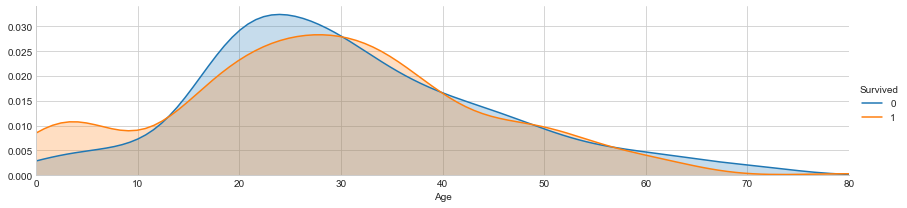

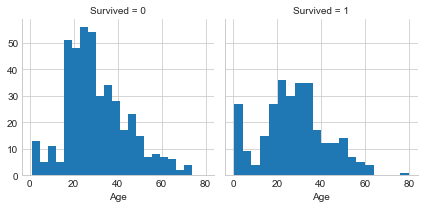

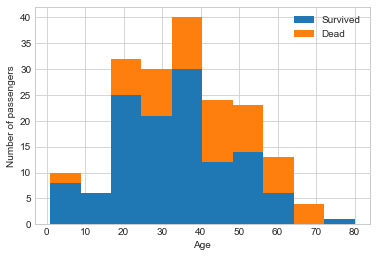

In [223]:
plt.figure(figsize=(13,8))
facet = sns.FacetGrid(df_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df_train['Age'].max()))
facet.add_legend()

plt.figure()
g = sns.FacetGrid(df_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

plt.figure()
plt.hist([df_train.dropna()[df_train.dropna()['Survived']==1]['Age'],df_train.dropna()[df_train.dropna()['Survived']==0]['Age']], stacked=True, label = ['Survived','Dead'])
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

Most No. of people from age 0-16 survived. <br>
Oldest person on the boat survived<br>
Most no. of people who were dead were from age 20-30

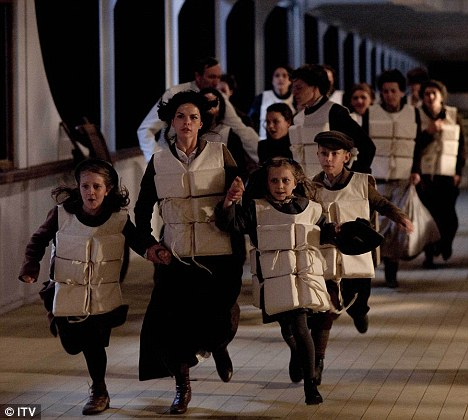

In [224]:
from IPython.display import Image
Image("http://cdn.playbuzz.com/cdn/30905c83-3f05-4f15-8a8c-7c9d5a783544/e28ea73a-a6c9-41e3-8529-43dfcce40292.jpg")

It seems *Women* and *Children* had the high chance of survival

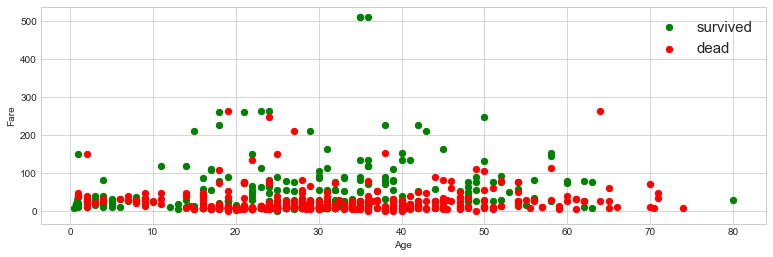

In [225]:
plt.figure(figsize=(13,4))
ax = plt.subplot()
ax.scatter(df_train[df_train['Survived']==1]['Age'],df_train[df_train['Survived']==1]['Fare'],c='green',s=40)
ax.scatter(df_train[df_train['Survived']==0]['Age'],df_train[df_train['Survived']==0]['Fare'],c='red',s=40)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')
ax.legend(('survived','dead'),scatterpoints=1,loc='upper right',fontsize=15,)

-> Most of the red bunch(dead) you can see are having lower fare and age ranging from 15-45

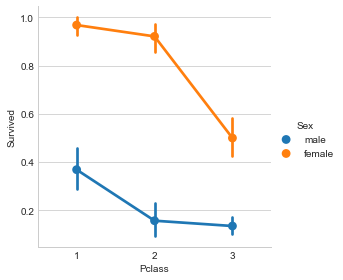

In [226]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)
pd.crosstab([df_train.Sex,df_train.Survived],df_train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

It makes sense why Jack(male from 3rd class) died and Rose(female from 1st class) survived according to james cameron

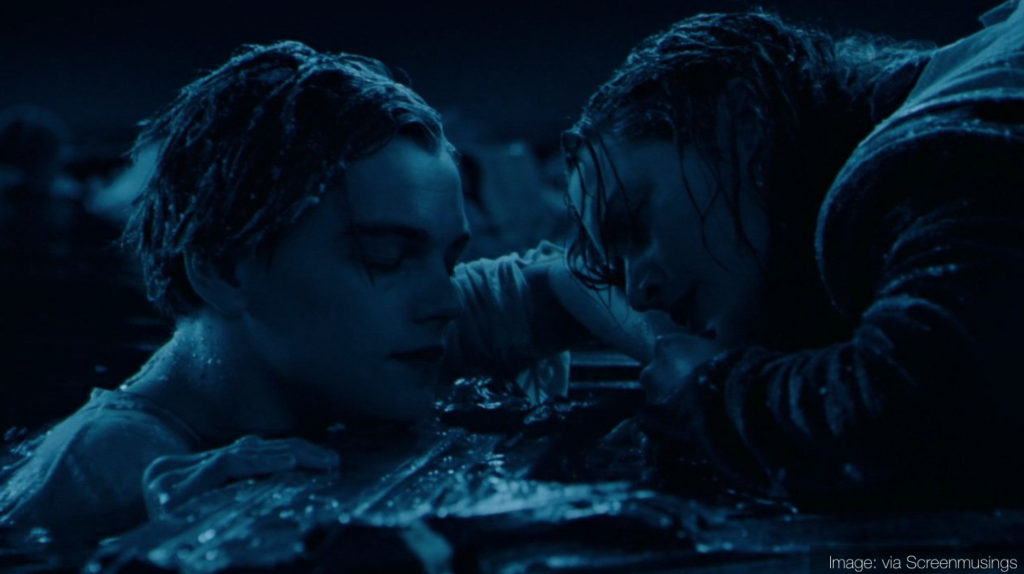

In [227]:
Image("http://d1v3t0rdobjdgs.cloudfront.net/wp-content/uploads/2017/12/10103525/Screen-Shot-2017-12-10-at-12.27.51-PM-1024x574.png",height=500,width=500)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


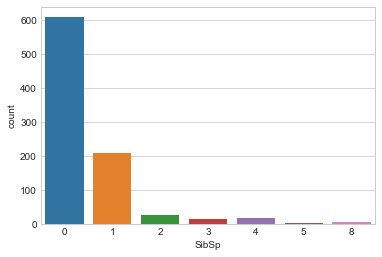

In [228]:
plt.figure()
sns.countplot(x='SibSp',data=df_train)

df_train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# Data Cleaning

## Replacing Null values

From previous analysis we know that we have to fill missing age data.
Rather than just just filing it by mean, median, We will check the title of every person and guess their average age.

In [229]:
df_train['Initial']=0
for i in df_train:
    df_train['Initial']=df_train.Name.str.extract('([A-Za-z]+)\.')
    
pd.crosstab(df_train.Initial,df_train.Sex).T.style.background_gradient(cmap='summer_r')    

D:\python\a\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  This is separate from the ipykernel package so we can avoid doing imports until


Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [230]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


now replacing some less used titles with the common ones

In [231]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

Checking the avg. age for titles and filling them for null values

In [232]:
df_train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [233]:
# FIlling the Nan value
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age']=33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age']=36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age']=5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age']=22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age']=46

In [234]:
## If filling the missing age by their Pclass(It could be good predictor too)

# def impute_age(cols):
#     Age = cols[0]
#     Pclass = cols[1]
    
#     if pd.isnull(Age):

#         if Pclass == 1:
#             return 37

#         elif Pclass == 2:
#             return 29

#         else:
#             return 24

#     else:
#         return Age

# df_train['Age'] = df_train[['Age','Pclass']].apply(impute_age,axis=1)

Filling NA values in 'Embarked'

In [235]:
#mmaximum passenger boarded from 'S'
df_train['Embarked'].fillna('S',inplace=True)

In [236]:
df_train.Age.isnull().any()
# checking any null value

False

## Coverting Categorical variable

In [237]:
df_train['Gender'] = df_train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
df_train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)


In [238]:
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
df_train = pd.concat([df_train,embark],axis=1)
#axis for shape 

In [239]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Gender,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,0,1


## Dropping unnecessary column and remaining NaN values

->dropping 'Embarked' because we got the dummies <br>
->dropping 'Sex' because we have already replaced with 'Gender'

In [240]:
df_train.drop(['Cabin','Name','Sex','Embarked','Ticket'],axis=1,inplace=True)

# Check Corelation for redundancy

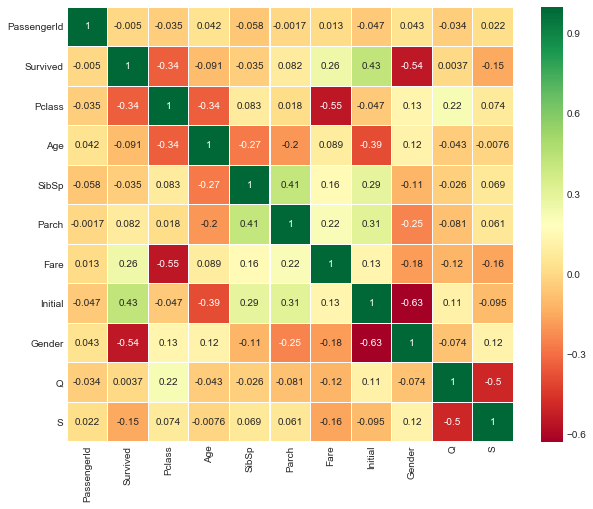

In [241]:
sns.heatmap(df_train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### Interpretation
Only the numeric features are compared

Positive Correlation- Increase in feature A leads to increase in feauture B. <br>
Negative Correlation- Increase in feauture A leads to decrease in feaure B   <br>

+1 means perfect positive correlation <br>
-1 means perfect negative correlation <br>

We check the redundancy through this and eliminate redundant features as both of them contains the same information 
This is also known as Multicolinearity


From the heatmap we see that their is no much corelation. So we dont have to drop any feauture here


# Importing Models

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Split for Training Testing

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
X_train, X_test, y_train, y_test= train_test_split(df_train.drop('Survived',axis=1),
                                                  df_train['Survived'], test_size=0.30,
                                                  random_state= 101)

# Predicting and Evaluation

### Logistic Regression

In [245]:
#Instantiate the model(using dfault paramenter)
logreg= LogisticRegression()

#fit the model with Data
logreg.fit(X_train,y_train)

#Predecting the responce on Testing
prediction= logreg.predict(X_test)

print('Accuracy for logistic regression is' ,metrics.accuracy_score(prediction,y_test))

Accuracy for logistic regression is 0.787313432836


In [246]:
acc_log = (logreg.score(X_train, y_train) * 100)
acc_log

81.380417335473524

In [247]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.77      0.90      0.83       154
          1       0.82      0.64      0.72       114

avg / total       0.79      0.79      0.78       268



In [248]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = pd.DataFrame(X_train.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

,Features,Coefficient Estimate
0,Pclass,0.000427
1,Age,-0.722803
2,SibSp,-0.019562
3,Parch,-0.330911
4,Fare,-0.150084
5,Initial,0.007780
6,Gender,0.458780
7,Q,-2.010309
8,S,-0.130153


### Decision Tree

In [249]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction1=model.predict(X_test)
print('Accuracy for Decision Tree is',metrics.accuracy_score(prediction1,y_test))

Accuracy for Decision Tree is 0.727611940299


In [250]:
print(classification_report(y_test,prediction1))

             precision    recall  f1-score   support

          0       0.74      0.81      0.77       154
          1       0.71      0.61      0.66       114

avg / total       0.73      0.73      0.72       268



### Random Forest



In [251]:
model1=RandomForestClassifier(n_estimators=100)
model1.fit(X_train,y_train)
prediction2=model1.predict(X_test)
print('Accuracy of the Random Forests is',metrics.accuracy_score(prediction2,y_test))

Accuracy of the Random Forests is 0.832089552239


In [252]:
print(classification_report(y_test,prediction2))

             precision    recall  f1-score   support

          0       0.81      0.92      0.86       154
          1       0.87      0.71      0.78       114

avg / total       0.84      0.83      0.83       268



### K Nearest neighbour

The number of neihbours can also be changed and checked within the series, We will go here on default neigbours i.e 5

In [253]:
model2=KNeighborsClassifier() 
model2.fit(X_train,y_train)
prediction3=model2.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction3,y_test))

The accuracy of the KNN is 0.608208955224


In [254]:
print(classification_report(y_test,prediction3))

             precision    recall  f1-score   support

          0       0.63      0.79      0.70       154
          1       0.56      0.37      0.44       114

avg / total       0.60      0.61      0.59       268



### Gaussian Naive Bayes

In [255]:
model3=GaussianNB()
model3.fit(X_train,y_train)
prediction4=model3.predict(X_test)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction4,y_test))

The accuracy of the NaiveBayes is 0.768656716418


In [256]:
print(classification_report(y_test,prediction4))

             precision    recall  f1-score   support

          0       0.78      0.82      0.80       154
          1       0.75      0.69      0.72       114

avg / total       0.77      0.77      0.77       268



### Radial Support Vector Machine

In [257]:
model4=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model4.fit(X_train,y_train)
prediction5=model4.predict(X_test)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction5,y_test))

Accuracy for rbf SVM is  0.567164179104


In [258]:
print(classification_report(y_test,prediction5))

             precision    recall  f1-score   support

          0       0.57      0.98      0.72       154
          1       0.25      0.01      0.02       114

avg / total       0.44      0.57      0.42       268



### Linear Support Vector Machine

In [259]:
model5=svm.SVC(kernel='linear',C=0.1,gamma=0.1)
model5.fit(X_train,y_train)
prediction6=model5.predict(X_test)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction6,y_test))

Accuracy for linear SVM is 0.772388059701


In [260]:
print(classification_report(y_test,prediction6))

             precision    recall  f1-score   support

          0       0.77      0.86      0.81       154
          1       0.78      0.65      0.71       114

avg / total       0.77      0.77      0.77       268



# Comparing Models 

In [261]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Gaussian','k-nearest','Random Forest','Decison Tree','Linear SVM','Radical SVM'],
    'Score': [metrics.accuracy_score(prediction,y_test),metrics.accuracy_score(prediction4,y_test),metrics.accuracy_score(prediction3,y_test)
             ,metrics.accuracy_score(prediction2,y_test), metrics.accuracy_score(prediction1,y_test),metrics.accuracy_score(prediction6,y_test)
             , metrics.accuracy_score(prediction5,y_test)]})
models

,Model,Score
0,Logistic Regression,0.787313
1,Gaussian,0.768657
2,k-nearest,0.608209
3,Random Forest,0.832090
4,Decison Tree,0.727612
5,Linear SVM,0.772388
6,Radical SVM,0.567164


Clearly the Random Forest is the winner here in my Prediction

# Extra topics for learning

## Cross Validation
As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as model variance.

To overcome this and get a generalized model,we use Cross Validation. <br>

Many a times, the data is imbalanced, i.e there may be a high number of class1 instances but less number of other class instances. Thus we should train and test our algorithm on each and every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.

1)The K-Fold Cross Validation works by first dividing the dataset into k-subsets.

2)Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.

3)We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.

This is called K-Fold Cross Validation.

4)An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross-validation, we can achieve a generalised model.

## Feauture Selection

When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential.

In fact, feature selection comes with many benefits:

It decreases redundancy among the data
It speeds up the training process
It reduces overfitting
Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features

In [262]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=200)
clf = clf.fit(X_train,y_train)

In [263]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features

,feature,importance
0,PassengerId,0.158333
1,Pclass,0.097395
2,Age,0.145907
3,SibSp,0.051793
4,Parch,0.032998
5,Fare,0.144416
6,Initial,0.117579
7,Gender,0.216590
8,Q,0.010503
9,S,0.024485
